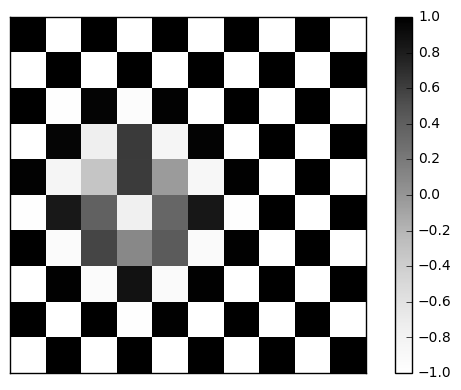


 2.107680082321167


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import animation
import time as tm

start = tm.time()

n = 10   ## grid size n*n

a = -1; b = 0; c = -1;  ##parámetros
D = 1; 

t = 0.0            ## inicializar tiempo 
total_time = 30    ## tiempo total de la simulación
dt = 0.2           ## time-step

minim = -1   ## para normalitzar los colores del plot en [-1,1]
maxim = 1

def nnmean(X):                         ## operador que calcula el valor medio de los 4 vecinos
    return (1/4)*(np.roll(X,+1,axis=0)  ## del array X[i,j], es decir, (1/4)*( X[i,j+1] + X[i+1,j] +X[i-1,j] + X[i,j-1] )
            +np.roll(X,-1,axis=0)       ## con condiciones de contorno periódicas (la función np.roll())
            +np.roll(X,+1,axis=1)
            +np.roll(X,-1,axis=1))

#ims=[]    ### para hacer el video

fig = plt.figure()

cm = 'Greys'                                ## estilo del plot
ax = fig.add_subplot(111, aspect='equal')
ax.set_xticks([]) 
ax.set_yticks([]) 
sm = plt.cm.ScalarMappable(cmap=cm)
sm.set_array([])
sm.set_clim(vmin=minim, vmax=maxim)
cbar = plt.colorbar(sm)

u = np.random.random((n,n))       #inicializamos el array con valores aleatorios

## alternativamente, podríamos inicializar con todo zeros

#u = np.zeros((n,n))

## o todo unos o -unos

#u = np.ones((n,n))
#u = -np.ones((n,n))

## bucle en el que calculamos la dinámica de cada celda

while t < total_time:
    t += dt
    u = u + dt*(a*u + b*u**2  + c*u**3 + D*(u - nnmean(u)))  ## equacion que iteramos
    im = plt.imshow(u, vmin=minim, vmax=maxim, cmap=cm, interpolation = 'none')   ## plot
    
    #ims.append([im])
    
## todo esto es para hacer el video

#writer = animation.FFMpegWriter(fps = 50, codec="libx264", bitrate=-1, extra_args=['-pix_fmt', 'yuv420p'])
#ani = animation.ArtistAnimation(fig,ims, blit = True)
#ani.save('landau.mp4',writer = writer, dpi = 200)

fig.tight_layout()
plt.savefig('landau_pattern.pdf', transparent=True)

plt.show()

end = tm.time()

print('\n', end - start)